In [1]:
import os
import pathlib
import sys
import socket

hostname = socket.gethostname()

abs_path = str(pathlib.Path(hostname).parent.absolute())
WORKDIR = abs_path[:- (len(abs_path.split('/')[-2] + abs_path.split('/')[-1])+1)]


if "mimi" in hostname:
    print(hostname)
    DATA_DIR = "/scratch/franzihe/"
    FIG_DIR = "/uio/kant/geo-metos-u1/franzihe/Documents/Figures/CMIP6/"
elif "glefsekaldt" in hostname: 
    DATA_DIR = "/home/franzihe/Data/"
    FIG_DIR = "/home/franzihe/Documents/Figures/CMIP6/"

INPUT_DATA_DIR = os.path.join(DATA_DIR, 'input')
OUTPUT_DATA_DIR = os.path.join(DATA_DIR, 'output')
UTILS_DIR = os.path.join(WORKDIR, 'utils')

sys.path.append(UTILS_DIR)
# make figure directory
try:
    os.mkdir(FIG_DIR)
except OSError:
    pass

mimi.uio.no


## Import python packages
- `Python` environment requirements: file [requirements_globalsnow.txt](../../requirements_globalsnow.txt) 
- load `python` packages from [imports.py](../../utils/imports.py)
- load `functions` from [functions.py](../../utils/functions.py)


In [3]:
# supress warnings
import warnings
warnings.filterwarnings('ignore') # don't output warnings

# import packages
from imports import(pd, glob, np, plt, wget,cm, HTTPError)


In [4]:
# reload imports
%load_ext autoreload
%autoreload 2

In [5]:
cmip_in = os.path.join(INPUT_DATA_DIR, 'cmip6_hist')
cmip_out = os.path.join(INPUT_DATA_DIR, 'cmip6_hist/daily_means')
# make output data directory
try:
    os.mkdir(cmip_out)
    os.mkdir(cmip_in)
except OSError:
    pass

In [5]:
da = pd.DataFrame()
# for file in sorted(glob('{}/*clw_cli_clivi_lwp_tas_prsn*.json'.format(cmip_in))):
for file in sorted(glob('{}/*clw_cli_clivi_lwp_tas_prsn_pfull*.json'.format(cmip_in))):

# for file in sorted(glob('esgf_search*')):
    print('reading file:', file)
    df = pd.read_json(file)
    
    _da = pd.DataFrame({'index': range(len(df['response']['docs']))}, columns=['index',
                        'activity_id',
                        'institution_id',
                        'source_id',
                        'xloc',
                        'experiment_id',
                        'member_id',
                        'yloc',
                        'table_id',
                        'variable_id',
                        'grid_label',
                        'version',
                        'data_node',
                        'directory_format_template_'])
    _da = _da.set_index('index')

    
    for i in range(len(df['response']['docs'])):
        _da['activity_id'][i]    = df['response']['docs'][i]['activity_id'][0]
        _da['institution_id'][i] = df['response']['docs'][i]['institution_id'][0]
        _da['source_id'][i]      = df['response']['docs'][i]['source_id'][0]
        _da['experiment_id'][i]  = df['response']['docs'][i]['experiment_id'][0]
        _da['member_id'][i]      = df['response']['docs'][i]['member_id'][0]
        _da['table_id'][i]       = df['response']['docs'][i]['table_id'][0]
        _da['variable_id'][i]    = df['response']['docs'][i]['variable_id'][0]
        _da['grid_label'][i]     = df['response']['docs'][i]['grid_label'][0]
        _da['version'][i]        = df['response']['docs'][i]['version']
        _da['data_node'][i]      = df['response']['docs'][i]['data_node']
        # _da['directory_format_template_'][i] = df['response']['docs'][i]['directory_format_template_']
       
        # 
    da = pd.concat([da, _da])

da.reset_index(inplace = True,drop=True)

reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_01.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_02.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_03.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_04.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_05.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_06.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_07.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_08.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_09.json
reading file: /scratch/franz

In [6]:
for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):
    for member in sorted(da['member_id'].unique()):        
        # remove models and ensemble member where no snow available
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'prsn']) < 1:
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clw']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'cli']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clivi']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'tas']).index
            da.drop(idx3, inplace=True)
        
        # remove models and ensemble member where no 2m temperature available
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'tas']) < 1:
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clw']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'cli']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clivi']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'prsn']).index
            da.drop(idx3, inplace=True)
        
        # remove models and ensemble member where no cloud liquid water available
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clw']) < 1:
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'tas']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'cli']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clivi']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'prsn']).index
            da.drop(idx3, inplace=True)


for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):      
    for member, k in zip(sorted(da['member_id'].unique()), range(len(sorted(da['member_id'].unique())))):
    #     (da.loc[da['member_id'] == member])['yloc'] = k 
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member])) >= 4:# and len((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'prsn']) != 0:
            idx2 = ((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).index
            da['yloc'][idx2] = k
        elif len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member])) <4:# and 
            idx2 = ((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).index
            da.drop(idx2, inplace=True)
    
    


In [7]:
# for id in ((da.loc[da['source_id'] == 'IPSL-CM5A2-INCA'])['member_id']).unique():
#     if id == 'r1i1p1f1':
#         continue
#     else:
#         da.drop(((da.loc[da['source_id'] == 'IPSL-CM5A2-INCA']).loc[da['member_id'] == id]).index, inplace=True)


In [8]:
for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'clw']).index
    da['xloc'][idx] = i+.05
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'cli']).index
    da['xloc'][idx] = i+.22
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'clivi']).index
    da['xloc'][idx] = i+.39
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'tas']).index
    da['xloc'][idx] = i+.56
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'prsn']).index
    da['xloc'][idx] = i+.73
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'pfull']).index
    da['xloc'][idx] = i+.9
    
da.reset_index(inplace = True,drop=True)



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

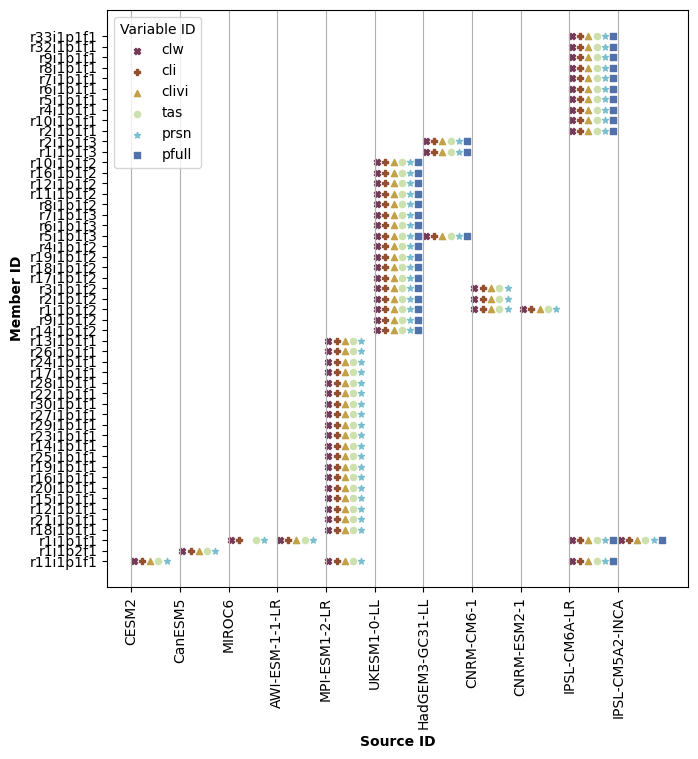

In [9]:
f, axsm = plt.subplots(1,1, figsize=[7.5, 7.5])

for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique())), ):
    
    if i == 0:
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clw']).plot.scatter(ax=axsm,x='xloc', y='member_id', marker='X', color=cm.romaO(range(0, 256, int(256 / 6)))[0], label='clw', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'cli']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='P', color=cm.romaO(range(0, 256, int(256 / 6)))[1], label='cli', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clivi']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='^', color=cm.romaO(range(0, 256, int(256 / 6)))[2], label='clivi', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'tas']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='o', color=cm.romaO(range(0, 256, int(256 / 6)))[3], label='tas', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'prsn']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='*', color=cm.romaO(range(0, 256, int(256 / 6)))[4], label='prsn', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'pfull']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='s', color=cm.romaO(range(0, 256, int(256 / 6)))[5], label='pfull', )#alpha=0.5, edgecolors='none')
    
    
    else:
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clw']).plot.scatter(ax=axsm,x='xloc', y='member_id', marker='X', color=cm.romaO(range(0, 256, int(256 / 6)))[0], label='_nolegend_', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'cli']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='P', color=cm.romaO(range(0, 256, int(256 / 6)))[1], label='_nolegend_', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clivi']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='^', color=cm.romaO(range(0, 256, int(256 / 6)))[2], label='_nolegend_', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'tas']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='o', color=cm.romaO(range(0, 256, int(256 / 6)))[3], label='_nolegend_', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'prsn']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='*', color=cm.romaO(range(0, 256, int(256 / 6)))[4], label='_nolegend_', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'pfull']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='s', color=cm.romaO(range(0, 256, int(256 / 6)))[5], label='pfull', )#alpha=0.5, edgecolors='none')
    

axsm.legend(labels=['clw', 'cli', 'clivi', 'tas', 'prsn', 'pfull'], loc=0, title='Variable ID', )
axsm.set_xticks(ticks=range(len(da['source_id'].unique())), labels=da['source_id'].unique(),rotation=90, fontsize=10)

# axsm.set_yticks(da['yloc'].unique(), labels=da['member_id'].unique(), fontsize=8)
axsm.grid(axis='x')
# Set common labels
axsm.set_xlabel('Source ID', fontweight='bold')
axsm.set_ylabel('Member ID', fontweight='bold');

plt.savefig(FIG_DIR + 'cmip6_model_variables.png', format = 'png', bbox_inches = 'tight', transparent = False)

In [6]:
var_id = [
#     'r10i1p1f1',
# 'r10i1p2f1',
# 'r11i1p1f1',
# 'r11i1p2f1',
# 'r12i1p1f1',
# 'r13i1p1f1',
# 'r14i1p1f1',
# 'r15i1p1f1',
# 'r16i1p1f1',
# 'r17i1p1f1',
# 'r18i1p1f1',
# 'r19i1p1f1',
# 'r1i1p2f1',
# 'r1i1p1f1',
# 'r20i1p1f1',
# 'r21i1p1f1',
# 'r22i1p1f1',
# 'r23i1p1f1',
# 'r24i1p1f1',
# 'r25i1p1f1',
# 'r26i1p1f1',
# 'r27i1p1f1',
# 'r28i1p1f1',
# 'r29i1p1f1',
# 'r2i1p1f1',
# 'r2i1p2f1',
# 'r30i1p1f1',
# 'r31i1p1f1',
# 'r32i1p1f1',
# 'r33i1p1f1',
# 'r34i1p1f1',
# 'r35i1p1f1',
# 'r36i1p1f1',
# 'r37i1p1f1',
# 'r38i1p1f1',
# 'r39i1p1f1',
# 'r3i1p1f1',
# 'r3i1p2f1',
# 'r40i1p1f1',
# 'r4i1p1f1',
# 'r4i1p2f1',
# 'r5i1p1f1',
# 'r5i1p2f1',
# 'r6i1p1f1',
# 'r6i1p2f1',
# 'r7i1p1f1',
# 'r7i1p2f1',
# 'r8i1p1f1',
# 'r8i1p2f1',
# 'r9i1p1f1',
# 'r9i1p2f1',
'r11i1p1f1',
'r1i1p1f1',
'r1i1p1f2',
'r1i1p2f1',
'r2i1p1f2',
'r5i1p1f3',
]


In [16]:
def get_download_dict(var_id):
        down = {
                'CESM2': {'node':['http://esgf-data.ucar.edu/thredds/fileServer/esg_dataroot/CMIP6/CMIP/'],
                        'mdir': ['NCAR/CESM2/historical/{}/day/prsn/gn/v20200124/'.format(var_id),
                                'NCAR/CESM2/historical/{}/day/tas/gn/v20190514/'.format(var_id),
                                'NCAR/CESM2/historical/{}/CFday/clivi/gn/v20190514/'.format(var_id),
                                'NCAR/CESM2/historical/{}/CFday/clw/gn/v20190514/'.format(var_id),
                                'NCAR/CESM2/historical/{}/day/pr/gn/v20190514/'.format(var_id),
                                'NCAR/CESM2/historical/{}/fx/areacella/gn/v20190514/'.format(var_id)],
                        'file': ['prsn_day_CESM2_historical_{}_gn_20000101-20150101.nc'.format(var_id),
                                'tas_day_CESM2_historical_{}_gn_20000101-20091231.nc'.format(var_id),
                                'clivi_CFday_CESM2_historical_{}_gn_20000101-20091231.nc'.format(var_id),
                                'clw_CFday_CESM2_historical_{}_gn_20000101-20091231.nc'.format(var_id),
                                'pr_day_CESM2_historical_{}_gn_20100101-20150101.nc'.format(var_id),
                                'areacella_fx_CESM2_historical_{}_gn.nc'.format(var_id)],
                        'var_id': ['{}']},
                'CanESM5': {'node':['http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esgC_dataroot/AR6/CMIP6/CMIP/'],
                        'mdir':['CCCma/CanESM5/historical/{}/day/prsn/gn/v20190429/'.format(var_id),
                                'CCCma/CanESM5/historical/{}/day/tas/gn/v20190429/'.format(var_id),
                                'CCCma/CanESM5/historical/{}/CFday/clivi/gn/v20190429/'.format(var_id),
                                'CCCma/CanESM5/historical/{}/CFday/clw/gn/v20190429/'.format(var_id),
                                'CCCma/CanESM5/historical/{}/day/pr/gn/v20190429/'.format(var_id),
                                'CCCma/CanESM5/historical/{}/fx/areacella/gn/v20190429/'.format(var_id)],
                        'file':['prsn_day_CanESM5_historical_{}_gn_18500101-20141231.nc'.format(var_id),
                                'tas_day_CanESM5_historical_{}_gn_18500101-20141231.nc'.format(var_id),
                                'clivi_CFday_CanESM5_historical_{}_gn_18500101-20141231.nc'.format(var_id),
                                'clw_CFday_CanESM5_historical_{}_gn_20010101-20101231.nc'.format(var_id),
                                'pr_day_CanESM5_historical_{}_gn_18500101-20141231.nc'.format(var_id),
                                'areacella_fx_CanESM5_historical_{}_gn.nc'],
                        'var_id': []},
                'MIROC6': {'node':[ 'https://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/'],
                        'mdir': ['MIROC/MIROC6/historical/{}/day/prsn/gn/v20191016/'.format(var_id),
                                'MIROC/MIROC6/historical/{}/day/tas/gn/v20191016/'.format(var_id),
                                'MIROC/MIROC6/historical/{}/CFday/cli/gn/v20191212/'.format(var_id),
                                'MIROC/MIROC6/historical/{}/CFday/clw/gn/v20191212/'.format(var_id),
                                'MIROC/MIROC6/historical/{}/CFday/cli/gn/v20191212/'.format(var_id),
                                'MIROC/MIROC6/historical/{}/CFday/clw/gn/v20191212/'.format(var_id),
                                'MIROC/MIROC6/historical/{}/CFday/cli/gn/v20191212/'.format(var_id),
                                'MIROC/MIROC6/historical/{}/CFday/clw/gn/v20191212/'.format(var_id),
                                'MIROC/MIROC6/historical/{}/CFday/cli/gn/v20191212/'.format(var_id),
                                'MIROC/MIROC6/historical/{}/CFday/clw/gn/v20191212/'.format(var_id),
                                'MIROC/MIROC6/historical/{}/day/pr/gn/v20200519/'.format(var_id),
                                'MIROC/MIROC6/historical/{}/fx/areacella/gn/v20200519/'.format(var_id)],
                        'file': ['prsn_day_MIROC6_historical_{}_gn_20000101-20091231.nc'.format(var_id),
                                'tas_day_MIROC6_historical_{}_gn_20000101-20091231.nc'.format(var_id),
                                'cli_CFday_MIROC6_historical_{}_gn_20060101-20061231.nc'.format(var_id),
                                'clw_CFday_MIROC6_historical_{}_gn_20060101-20061231.nc'.format(var_id),
                                'cli_CFday_MIROC6_historical_{}_gn_20070101-20071231.nc'.format(var_id),
                                'clw_CFday_MIROC6_historical_{}_gn_20070101-20071231.nc'.format(var_id),
                                'cli_CFday_MIROC6_historical_{}_gn_20080101-20081231.nc'.format(var_id),
                                'clw_CFday_MIROC6_historical_{}_gn_20080101-20081231.nc'.format(var_id),
                                'cli_CFday_MIROC6_historical_{}_gn_20090101-20091231.nc'.format(var_id),
                                'clw_CFday_MIROC6_historical_{}_gn_20090101-20091231.nc'.format(var_id),
                                'pr_day_MIROC6_historical_{}_gn_20000101-20091231.nc'.format(var_id),
                                'areacella_fx_MIROC6_historical_{}_gn.nc'.format(var_id)],
                        'var_id': []},
                'AWI-ESM-1-1-LR': {'node':[ 'http://esgf3.dkrz.de/thredds/fileServer/cmip6/CMIP/'],
                                'mdir': ['AWI/AWI-ESM-1-1-LR/historical/{}/day/prsn/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/day/tas/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/CFday/clivi/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/CFday/clw/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/day/pr/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/day/prsn/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/day/tas/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/CFday/clivi/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/CFday/clw/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/day/pr/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/day/prsn/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/day/tas/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/CFday/clivi/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/CFday/clw/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/day/pr/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/day/prsn/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/day/tas/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/CFday/clivi/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/CFday/clw/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/day/pr/gn/v20200212/'.format(var_id),
                                        'AWI/AWI-ESM-1-1-LR/historical/{}/fx/areacella/gn/v20200212/'.format(var_id)],
                                'file': ['prsn_day_AWI-ESM-1-1-LR_historical_{}_gn_20060101-20061231.nc'.format(var_id),
                                        'tas_day_AWI-ESM-1-1-LR_historical_{}_gn_20060101-20061231.nc'.format(var_id),
                                        'clivi_CFday_AWI-ESM-1-1-LR_historical_{}_gn_20060101-20061231.nc'.format(var_id),
                                        'clw_CFday_AWI-ESM-1-1-LR_historical_{}_gn_20060101-20061231.nc'.format(var_id),
                                        'pr_day_AWI-ESM-1-1-LR_historical_{}_gn_20060101-20061231.nc'.format(var_id),
                                        'prsn_day_AWI-ESM-1-1-LR_historical_{}_gn_20070101-20071231.nc'.format(var_id),
                                        'tas_day_AWI-ESM-1-1-LR_historical_{}_gn_20070101-20071231.nc'.format(var_id),
                                        'clivi_CFday_AWI-ESM-1-1-LR_historical_{}_gn_20070101-20071231.nc'.format(var_id),
                                        'clw_CFday_AWI-ESM-1-1-LR_historical_{}_gn_20070101-20071231.nc'.format(var_id),
                                        'pr_day_AWI-ESM-1-1-LR_historical_{}_gn_20070101-20071231.nc'.format(var_id),
                                        'prsn_day_AWI-ESM-1-1-LR_historical_{}_gn_20080101-20081231.nc'.format(var_id),
                                        'tas_day_AWI-ESM-1-1-LR_historical_{}_gn_20080101-20081231.nc'.format(var_id),
                                        'clivi_CFday_AWI-ESM-1-1-LR_historical_{}_gn_20080101-20081231.nc'.format(var_id),
                                        'clw_CFday_AWI-ESM-1-1-LR_historical_{}_gn_20080101-20081231.nc'.format(var_id),
                                        'pr_day_AWI-ESM-1-1-LR_historical_{}_gn_20080101-20081231.nc'.format(var_id),
                                        'prsn_day_AWI-ESM-1-1-LR_historical_{}_gn_20090101-20091231.nc'.format(var_id),
                                        'tas_day_AWI-ESM-1-1-LR_historical_{}_gn_20090101-20091231.nc'.format(var_id),
                                        'clivi_CFday_AWI-ESM-1-1-LR_historical_{}_gn_20090101-20091231.nc'.format(var_id),
                                        'clw_CFday_AWI-ESM-1-1-LR_historical_{}_gn_20090101-20091231.nc'.format(var_id),
                                        'pr_day_AWI-ESM-1-1-LR_historical_{}_gn_20090101-20091231.nc'.format(var_id),
                                        'areacella_fx_AWI-ESM-1-1-LR_historical_{}_gn.nc'.format(var_id)],
                                'var_id':[]},
                
                'MPI-ESM1-2-LR': {'node':['http://esgf3.dkrz.de/thredds/fileServer/cmip6/CMIP/'],
                                'mdir': ['MPI-M/MPI-ESM1-2-LR/historical/{}/day/prsn/gn/v20210901/'.format(var_id),
                                        'MPI-M/MPI-ESM1-2-LR/historical/{}/day/tas/gn/v20210901/'.format(var_id),
                                        'MPI-M/MPI-ESM1-2-LR/historical/{}/CFday/clivi/gn/v20210901/'.format(var_id),
                                        'MPI-M/MPI-ESM1-2-LR/historical/{}/CFday/clw/gn/v20210901/'.format(var_id),
                                        'MPI-M/MPI-ESM1-2-LR/historical/{}/day/pr/gn/v20190710/'.format(var_id),
                                        'MPI-M/MPI-ESM1-2-LR/historical/{}/fx/areacella/gn/v20190710/'.format(var_id)],
                                'file': ['prsn_day_MPI-ESM1-2-LR_historical_{}_gn_19900101-20091231.nc'.format(var_id),
                                        'tas_day_MPI-ESM1-2-LR_historical_{}_gn_19900101-20091231.nc'.format(var_id),
                                        'clivi_CFday_MPI-ESM1-2-LR_historical_{}_gn_19900101-20091231.nc'.format(var_id),
                                        'clw_CFday_MPI-ESM1-2-LR_historical_{}_gn_19900101-20091231.nc'.format(var_id),
                                        'pr_day_MPI-ESM1-2-LR_historical_{}_gn_19900101-20091231.nc'.format(var_id),
                                        'areacella_fx_MPI-ESM1-2-LR_historical_{}_gn.nc'.format(var_id)],
                                'var_id':[]},
                'CNRM-CM6-1': {'node':[ 'http://esg1.umr-cnrm.fr/thredds/fileServer/CMIP6_CNRM/CMIP/'],
                        'mdir': ['CNRM-CERFACS/CNRM-CM6-1/historical/{}/day/prsn/gr/v20180917/'.format(var_id),
                                        'CNRM-CERFACS/CNRM-CM6-1/historical/{}/day/tas/gr/v20180917/'.format(var_id),
                                        'CNRM-CERFACS/CNRM-CM6-1/historical/{}/CFday/clivi/gr/v20180917/'.format(var_id),
                                        'CNRM-CERFACS/CNRM-CM6-1/historical/{}/CFday/clw/gr/v20180917/'.format(var_id),
                                        'CNRM-CERFACS/CNRM-CM6-1/historical/{}/day/pr/gr/v20181126/'.format(var_id),
                                        'CNRM-CERFACS/CNRM-CM6-1/historical/{}/fx/areacella/gr/v20180917/'.format(var_id)],
                        'file': ['prsn_day_CNRM-CM6-1_historical_{}_gr_19500101-20141231.nc'.format(var_id),
                                        'tas_day_CNRM-CM6-1_historical_{}_gr_18500101-20141231.nc'.format(var_id),
                                        'clivi_CFday_CNRM-CM6-1_historical_{}_gr_19500101-20141231.nc'.format(var_id),
                                        'clw_CFday_CNRM-CM6-1_historical_{}_gr_20060101-20091231.nc'.format(var_id),
                                        'pr_day_CNRM-CM6-1_historical_{}_gr_19500101-20141231.nc'.format(var_id),
                                        'areacella_fx_CNRM-CM6-1_historical_{}_gr.nc'.format(var_id)],
                        'var_id': []},
                'CNRM-ESM2-1': {'node':[ 'http://esg1.umr-cnrm.fr/thredds/fileServer/CMIP6_CNRM/CMIP/'],
                                'mdir': ['CNRM-CERFACS/CNRM-ESM2-1/historical/{}/day/prsn/gr/v20181206/'.format(var_id),
                                        'CNRM-CERFACS/CNRM-ESM2-1/historical/{}/day/tas/gr/v20181206/'.format(var_id),
                                        'CNRM-CERFACS/CNRM-ESM2-1/historical/{}/CFday/clivi/gr/v20181206/'.format(var_id),
                                        'CNRM-CERFACS/CNRM-ESM2-1/historical/{}/CFday/clw/gr/v20181206/'.format(var_id),
                                        'CNRM-CERFACS/CNRM-ESM2-1/historical/{}/day/pr/gr/v20181206/'.format(var_id),
                                        'CNRM-CERFACS/CNRM-ESM2-1/historical/{}/fx/areacella/gr/v20190125/'.format(var_id),],
                                'file': ['prsn_day_CNRM-ESM2-1_historical_{}_gr_19500101-20141231.nc'.format(var_id),
                                        'tas_day_CNRM-ESM2-1_historical_{}_gr_18500101-20141231.nc'.format(var_id),
                                        'clivi_CFday_CNRM-ESM2-1_historical_{}_gr_19500101-20141231.nc'.format(var_id),
                                        'clw_CFday_CNRM-ESM2-1_historical_{}_gr_20060101-20091231.nc'.format(var_id),
                                        'pr_day_CNRM-ESM2-1_historical_{}_gr_19500101-20141231.nc'.format(var_id),
                                        'areacella_fx_CNRM-ESM2-1_historical_{}_gr.nc'.format(var_id),],
                                'var_id':[]},
                'IPSL-CM6A-LR': {'node':[ 'http://vesg.ipsl.upmc.fr/thredds/fileServer/cmip6/CMIP/'],
                                'mdir':['IPSL/IPSL-CM6A-LR/historical/{}/day/prsn/gr/v20180803/'.format(var_id),
                                        'IPSL/IPSL-CM6A-LR/historical/{}/day/tas/gr/v20190614/'.format(var_id),
                                        'IPSL/IPSL-CM6A-LR/historical/{}/CFday/clivi/gr/v20180803/'.format(var_id),
                                        'IPSL/IPSL-CM6A-LR/historical/{}/CFday/clw/gr/v20180803/'.format(var_id),
                                        'IPSL/IPSL-CM6A-LR/historical/{}/day/pr/gr/v20180803/'.format(var_id),
                                        'IPSL/IPSL-CM6A-LR/historical/{}/fx/areacella/gr/v20180803/'.format(var_id)],
                                'file': ['prsn_day_IPSL-CM6A-LR_historical_{}_gr_18500101-20141231.nc'.format(var_id),
                                        'tas_day_IPSL-CM6A-LR_historical_{}_gr_18500101-20141231.nc'.format(var_id),
                                        'clivi_CFday_IPSL-CM6A-LR_historical_{}_gr_18500101-20141231.nc'.format(var_id),
                                        'clw_CFday_IPSL-CM6A-LR_historical_{}_gr_20000101-20091231.nc'.format(var_id),
                                        'pr_day_IPSL-CM6A-LR_historical_{}_gr_18500101-20141231.nc'.format(var_id),
                                        'areacella_fx_IPSL-CM6A-LR_historical_{}_gr.nc'.format(var_id)],
                                'var_id':[]},
                'IPSL-CM5A2-INCA': {'node':[ 'http://vesg.ipsl.upmc.fr/thredds/fileServer/cmip6/CMIP/'],
                                'mdir': ['IPSL/IPSL-CM5A2-INCA/historical/{}/day/prsn/gr/v20200729/'.format(var_id),
                                        'IPSL/IPSL-CM5A2-INCA/historical/{}/day/tas/gr/v20200729/'.format(var_id),
                                        'IPSL/IPSL-CM5A2-INCA/historical/{}/CFday/clivi/gr/v20200729/'.format(var_id),
                                        'IPSL/IPSL-CM5A2-INCA/historical/{}/CFday/clw/gr/v20200729/'.format(var_id),
                                        'IPSL/IPSL-CM5A2-INCA/historical/{}/day/pr/gr/v20200729/'.format(var_id),
                                        'IPSL/IPSL-CM5A2-INCA/historical/{}/fx/areacella/gr/v20200729/'.format(var_id)],
                                'file': ['prsn_day_IPSL-CM5A2-INCA_historical_{}_gr_18500101-20141231.nc'.format(var_id),
                                        'tas_day_IPSL-CM5A2-INCA_historical_{}_gr_18500101-20141231.nc'.format(var_id),
                                        'clivi_CFday_IPSL-CM5A2-INCA_historical_{}_gr_18500101-20141231.nc'.format(var_id),
                                        'clw_CFday_IPSL-CM5A2-INCA_historical_{}_gr_19500101-20091231.nc'.format(var_id),
                                        'pr_day_IPSL-CM5A2-INCA_historical_{}_gr_18500101-20141231.nc'.format(var_id),
                                        'areacella_fx_IPSL-CM5A2-INCA_historical_{}_gr.nc'.format(var_id)],
                                'var_id': []}
        }
        return down

In [18]:
counter = 0
for vid in var_id:
    down = get_download_dict(vid)
    for model in down.keys():
        for node in down[model]['node']:
            for mdir in down[model]['mdir']:
                for file in down[model]['file']:
                    dwf = node + mdir + file
                    file_out = cmip_out + '/' + file
            
                    files = glob(file_out)
                    if file_out in files:
                        print(file + ' is downloaded')
                        counter += 1
                        print("Have downloaded in total : " + str(counter) + " files")
                    else:
                        print(dwf)
                        print(file)
                        
                        # Download file
                        try:
                            wget.download(dwf, file_out)
                            print('Download file ... ' + file)
                        except HTTPError:
                            print('File {} does not exist'.format(file))
                            continue

prsn_day_MIROC6_historical_r1i1p1f1_gn_20000101-20091231.nc is downloaded
Have downloaded in total : 1 files
tas_day_MIROC6_historical_r1i1p1f1_gn_20000101-20091231.nc is downloaded
Have downloaded in total : 2 files
cli_CFday_MIROC6_historical_r1i1p1f1_gn_20060101-20061231.nc is downloaded
Have downloaded in total : 3 files
clw_CFday_MIROC6_historical_r1i1p1f1_gn_20060101-20061231.nc is downloaded
Have downloaded in total : 4 files
https://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/MIROC/MIROC6/historical/r1i1p1f1/day/prsn/gn/v20191016/cli_CFday_MIROC6_historical_r1i1p1f1_gn_20070101-20071231.nc
/scratch/franzihe/input/cmip6_hist/daily_means/cli_CFday_MIROC6_historical_r1i1p1f1_gn_20070101-20071231.nc
File cli_CFday_MIROC6_historical_r1i1p1f1_gn_20070101-20071231.nc does not exist
clw_CFday_MIROC6_historical_r1i1p1f1_gn_20070101-20071231.nc is downloaded
Have downloaded in total : 5 files
cli_CFday_MIROC6_historical_r1i1p1f1_gn_20080101-20081231.nc is downloaded
Have

In [ ]:
# save all models and variables in excel
da.to_excel('{}/cmip6_model_variables.xlsx'.format(cmip_out), columns=['activity_id', 
                                                   'institution_id', 
                                                   'source_id',
                                                   'experiment_id',
                                                   'member_id',
                                                   'table_id',
                                                   'variable_id',
                                                   'grid_label',
                                                   'version'])